# Modelos de cores RGB e HSV:

**RGB** (Red, Green, Blue):

O modelo RGB é baseado na adição de luz em diferentes intensidades das cores vermelho, verde e azul para criar uma ampla gama de cores.
Cada pixel em uma imagem RGB é representado por três valores numéricos, indicando a intensidade de vermelho, verde e azul, respectivamente, em uma escala de 0 a 255 (ou 0 a 1, dependendo da convenção).

**HSV** (Hue, Saturation, Value):

O modelo HSV descreve as cores em termos de sua tonalidade (matiz), saturação e valor.


*   *Hue* (H): Representa a tonalidade da cor, indicando onde a cor está localizada no espectro de cores. É expresso em graus (0 a 360) ou (0 a 180) (no opencv) ou em uma escala normalizada (0 a 1).
*   *Saturation* (S): Refere-se à pureza ou intensidade da cor. Quanto maior o valor de saturação, mais intensa é a cor. É expresso como uma porcentagem (0% a 100%) ou em uma escala normalizada (0 a 1).

*   *Value* (V): Indica a luminosidade ou brilho da cor. Quanto maior o valor de valor, mais brilhante é a cor. É expresso como uma porcentagem (0% a 100%) ou em uma escala normalizada (0 a 1).

**Relação entre RGB e HSV:**

Enquanto o modelo RGB é baseado na adição de luz para criar cores, o modelo HSV é baseado na percepção humana de cores e facilita a manipulação e descrição das cores.

A conversão de uma imagem RGB para HSV (e vice-versa) permite que as cores sejam manipuladas com base em propriedades mais intuitivas, como matiz, saturação e brilho.

A conversão entre os modelos de cores RGB e HSV é comumente usada em aplicações de processamento de imagem para segmentação de cores, detecção de objetos e ajuste de cores.

No exemplo a seguir,


*   Uma imagem colorida RGB é importada com opencv (lembre que o opencv
interpreta como BGR)
*   A imagem é ajustada de BGR para RGB para fazer seu display com a biblioteca matlibplot
*   O padrão de cores da imagem é convertido para HSV
*   São definidos intervalos para limiarização no HSV
*   A imagem limiarizada é comparada com a imagem original



# Importação da imagem
Obs: uma caixa de importação "Escolher Arquivos" abrirá logo abaixo. Escolha em seu computador Peixes.jpg. Se preferir, utilize outra forma de importação.

Saving Peixes.jpg to Peixes (2).jpg


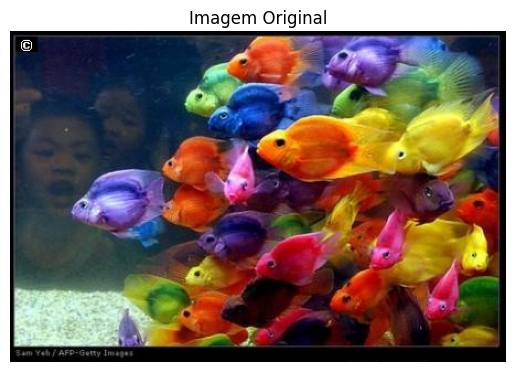

In [17]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Importar a imagem
uploaded = files.upload()
file_name = next(iter(uploaded))

# Converter a imagem para o espaço de cores HSV
image = cv2.imread(file_name)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Conversão para HSV

In [18]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Limiarização

In [23]:
# Definir os limiares para H, S e V
lower_threshold = np.array([0, 0, 0])  # Limiar inferior para H, S, V
upper_threshold = np.array([22, 255, 255])  # Limiar superior para H, S, V

# Aplicar os limiares na imagem HSV
masked_image = cv2.inRange(hsv_image, lower_threshold, upper_threshold)

# Criar a imagem final aplicando a máscara
result_bgr = cv2.bitwise_and(image, image, mask=masked_image)


# Conversão da imagem HSV limiarizada em RGB e Comparação com a imagem original

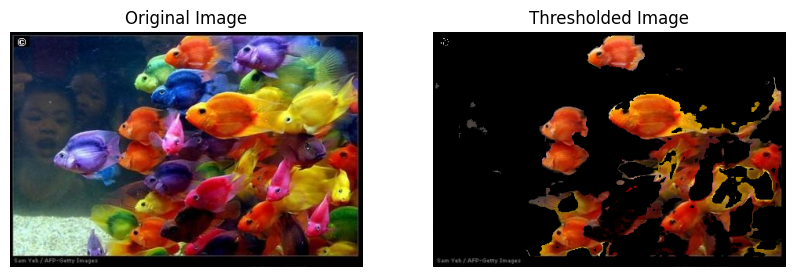

In [24]:
# Converter a imagem resultante para o formato RGB
result_rgb = cv2.cvtColor(result_bgr, cv2.COLOR_BGR2RGB)

# Exibir a imagem original e a imagem resultante
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

# TAREFA 1
No bloco abaixo,
* Determine os limiares HSV que gere uma imagem que remova os peixes, com exceção dos peixes amarelos
* Apresente seu resultado comparando com a imagem original

In [ ]:
# Faça aqui o Código da TAREFA 1



#TAREFA 2
No bloco abaixo,
* Importe a imagem Objetos.jpg
* Converta para HSV e faça a limiarização dos objetos vermelhos, ou seja, apresente uma imagem que mostre apenas os objetos vermelhos definindo os limiares lower_threshold e upper_threshold apropriados.

In [ ]:
# Faça aqui o Código da TAREFA 2


**Observações**:

* Site que converte rgb para hsv. https://www.peko-step.com/pt/tool/hsvrgb.html Ajuda a localizar as cores em HSV. Nesse site o H está entre 0 e 360, então o valor com opencv será a metade (opencv trabalha o H entre 0 e 180)

* Observem que lower_threshold = np.array([0, 0, 0]) e upper_threshold = np.array([180, 255, 255]) ) não afeta a imagem pois utiliza o intervalo HSV completo.
* Vocês podem procurar valores da faixa amarelo do H em representações na web como https://answers.opencv.org/upfiles/15181560142151344.png  ou em apps.
* Complemento: vídeo https://www.youtube.com/watch?v=MmBBVTniWFg